In [1]:
#importing the liberies
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the datasets
train=pd.read_csv('titanic_train.csv')
test=pd.read_csv('titanic_test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.shape

(891, 12)

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#dropping the Cabin column
train_df=train.drop(['Cabin'], axis=1)

In [10]:
#filling the missing data in the Embarked column with modal value of the column
mode_Embarked=train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(mode_Embarked, inplace=True)

<AxesSubplot:>

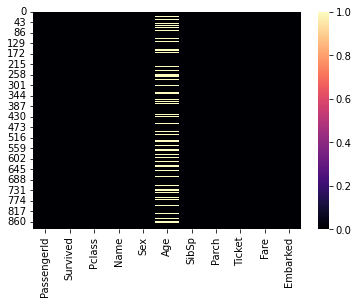

In [11]:
sns.heatmap(train_df.isnull(), cmap='magma')

In [12]:
#filling the missing values in the age column
from sklearn.ensemble import RandomForestRegressor
age_df = train_df[['Age','Survived','Fare', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[(train_df['Age'].notnull())]
age_df_isnull = age_df.loc[(train_df['Age'].isnull())]
X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]
# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000,n_jobs=-1)
RFR.fit(X,Y)
predictAges = RFR.predict(age_df_isnull.values[:,1:])
train_df.loc[train_df['Age'].isnull(), ['Age']]= predictAges


In [13]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

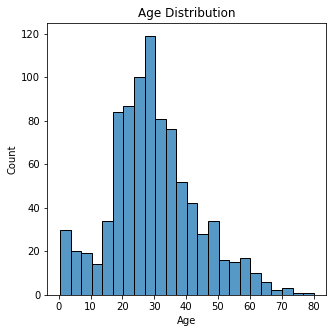

In [14]:
#Age distribution
plt.figure(figsize=(5,5))
sns.histplot(x='Age',data=train_df)
plt.title('Age Distribution')
plt.show()

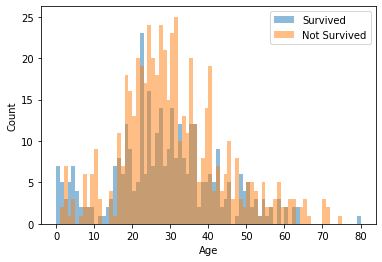

In [15]:
# Plot the age distribution for passengers who survived and those who did not
survived = train_df[train_df['Survived'] == 1]['Age'].dropna()
not_survived = train_df[train_df['Survived'] == 0]['Age'].dropna()
bins = range(0, 81, 1)
plt.hist(survived, bins=bins, alpha=0.5, label='Survived')
plt.hist(not_survived, bins=bins, alpha=0.5, label='Not Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()


<AxesSubplot:xlabel='Survived', ylabel='count'>

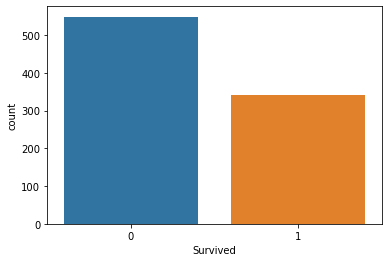

In [16]:
sns.countplot(x=train['Survived'])

In [17]:
train_df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass,Survived'>

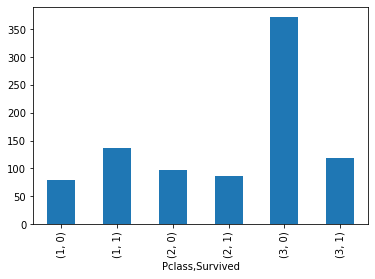

In [18]:
train_df.groupby(['Pclass', 'Survived'])['Survived'].count().plot.bar()

In [19]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
#Encoding Sex and Embarked
from sklearn.preprocessing import LabelEncoder
Label_Encoder=LabelEncoder()
train_df['Sex_Encode']=Label_Encoder.fit_transform(train_df['Sex'])
train_df['Embarked_Encode']=Label_Encoder.fit_transform(train_df['Embarked'])

In [21]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Encode,Embarked_Encode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,2


In [22]:
#dropping the columns not needed for modelling
train_new=train_df.drop(['PassengerId','Name','Sex','Ticket','Embarked'], axis=1)

In [23]:
train_new.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_Encode',
       'Embarked_Encode'],
      dtype='object')

In [24]:
x=train_new.drop(['Survived'], axis=1)
y=train_new['Survived']

In [25]:
#splitting the new train dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression()
LR_model.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred=LR_model.predict(x_test)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



In [29]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [31]:
#Checking for num values in the testset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [32]:
#missing fare
mean=test['Fare'].mean()
test['Fare'].fillna(mean, inplace=True)

In [33]:
#Encoding Sex and Embarked
from sklearn.preprocessing import LabelEncoder
Label_Encoder=LabelEncoder()
test['Sex_Encode']=Label_Encoder.fit_transform(test['Sex'])
test['Embarked_Encode']=Label_Encoder.fit_transform(test['Embarked'])

In [34]:
passenger_ids=test['PassengerId']

In [35]:
#dropping the columns not needed for prediction
test_new=test.drop(['PassengerId','Name','Sex','Ticket','Cabin','Embarked'], axis=1)

In [36]:
#filling the missing age in the testset
age_d = test_new[['Age','Fare', 'Parch', 'SibSp', 'Pclass','Sex_Encode','Embarked_Encode']]
age_d_notnull = age_d.loc[(test_new['Age'].notnull())]
age_d_isnull = age_d.loc[(test_new['Age'].isnull())]
X = age_d_notnull.values[:,1:]
Y = age_d_notnull.values[:,0]
# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000,n_jobs=-1)
RFR.fit(X,Y)
predictAges = RFR.predict(age_d_isnull.values[:,1:])
test_new.loc[test_new['Age'].isnull(), ['Age']]= predictAges

In [37]:
pred=LR_model.predict(test_new)

In [38]:
submission=pd.DataFrame({'PassengerId' : passenger_ids,'Survived':pred})

In [39]:
submission.to_csv('submission_titanic.csv', index=False)